In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import joblib

In [3]:
# Load the dataset
data_path = 'combined_csv.csv'  # Update this to your dataset path
data = pd.read_csv(data_path)

In [4]:
# Preparing the data: ignoring the first column and using all others except the last as features
X = data.iloc[:, 1:-1]  # All columns except the first (index 0) and the last
y = data.iloc[:, -1]    # The last column as the target variable


In [5]:
# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [6]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [7]:
# Perform K-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')


In [8]:
# Print the accuracy for each fold
print(f'Accuracy for each fold: {scores}')


Accuracy for each fold: [0.98402556 0.97124601 0.985623   0.984      0.9856    ]


In [9]:
# Print the mean accuracy across all folds
print(f'Mean K-Fold Accuracy: {np.mean(scores)}')


Mean K-Fold Accuracy: 0.9820989137380192


In [10]:
# Train the model on the entire dataset for deployment
model.fit(X, y)


RandomForestClassifier(random_state=42)

In [11]:
# Save the trained model
model_path = 'trained_random_forest_model.joblib'
joblib.dump(model, model_path)


['trained_random_forest_model.joblib']

In [ ]:

print(f"Model saved to {model_path}")

In [12]:
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.model_selection import KFold

In [13]:
# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [14]:
# Lists to store fold-wise results
confusion_matrices = []
log_losses = []

In [15]:
for train_index, test_index in kf.split(X):
    # Splitting data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Training the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Computing the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    # Computing log loss
    loss = log_loss(y_test, y_pred_proba)
    log_losses.append(loss)

In [16]:
# Display results
print("Confusion Matrices for Each Fold:")
for i, cm in enumerate(confusion_matrices, 1):
    print(f"Fold {i}:\n{cm}\n")

Confusion Matrices for Each Fold:
Fold 1:
[[457   4]
 [  6 159]]

Fold 2:
[[447   2]
 [ 16 161]]

Fold 3:
[[461   4]
 [  5 156]]

Fold 4:
[[475   5]
 [  5 140]]

Fold 5:
[[458   6]
 [  3 158]]



In [17]:
print("Log Loss for Each Fold:", log_losses)
print(f"Mean Log Loss: {np.mean(log_losses)}")

Log Loss for Each Fold: [0.10655281710020137, 0.1073577372633177, 0.09968270161918258, 0.10005915141859405, 0.09068047028958458]
Mean Log Loss: 0.10086657553817606


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [19]:
# Load the dataset
data_path = 'combined_csv.csv'  # Update this to the path of your dataset
data = pd.read_csv(data_path)

In [20]:
# Preparing the data
X = data.iloc[:, 1:-1]  # Ignoring the first column and using all others except the last as features
y = data.iloc[:, -1]    # The last column is the target


In [21]:
# Optionally, standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [23]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
# model = RandomForestClassifier(
#     n_estimators=150,      # More trees
#     max_depth=10,          # Limiting depth to prevent overfitting
#     min_samples_split=4,   # Minimum samples to split
#     min_samples_leaf=2,    # Minimum samples in a leaf
#     max_features='sqrt',   # Number of features for best split
#     bootstrap=True,        # Use bootstrap samples
#     random_state=42        # For reproducibility
# )

In [24]:
# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
# Validate the model
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')


Validation Accuracy: 0.9712


In [26]:
# Test the model
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')


Test Accuracy: 0.9728


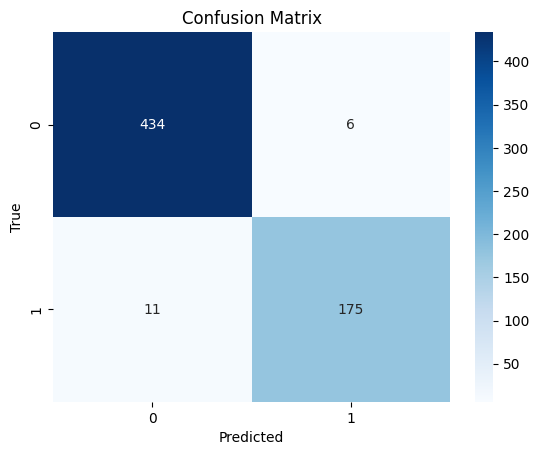

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [28]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       440
           1       0.97      0.94      0.95       186

    accuracy                           0.97       626
   macro avg       0.97      0.96      0.97       626
weighted avg       0.97      0.97      0.97       626



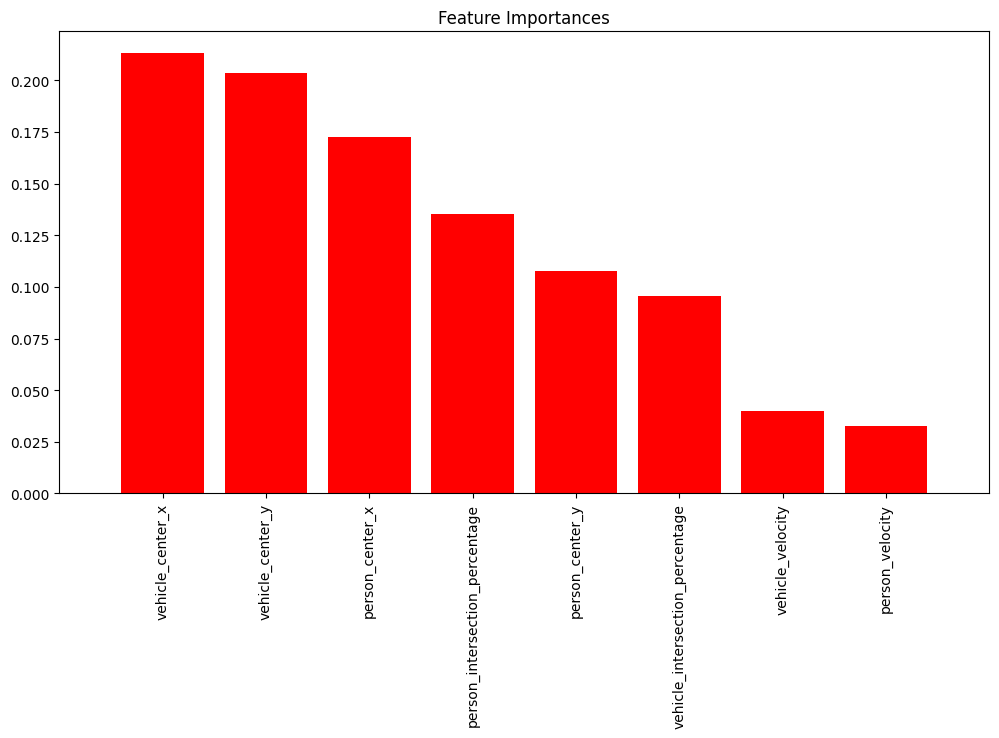

In [29]:
# Feature Importances
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), data.columns[1:-1][indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()